<b> K means Clustering </b>

K-Means Clustering is an unsupervised machine learning algorithm used to group data points into K distinct clusters based on their similarity.


<b> Where K-Means is Used </b>

1. Customer segmentation (marketing)

2. Image compression

3. Anomaly detection

4. Grouping similar documents

5. Understanding patterns in unlabeled data

<b>Steps in K-Means Clustering</b>

1. Choose the number of clusters (K)

You decide how many groups you want (e.g., K = 2, 3, 5).

Example:
You want to group customers into 3 clusters, so K = 3.

2. Initialize the centroids

K-Means randomly selects K points from the dataset as the starting centroids (cluster centers).

These centroids are not final—they will move during the process.

3. Assign each data point to the nearest centroid

For every data point:

Calculate its distance to each centroid

Assign it to the closest one

This forms K clusters.

👉 After this step, all points belong to some cluster.

4. Recompute the centroids

For each cluster:

Take all the points assigned to that cluster

Calculate their average position

That average becomes the new centroid.

👉 The centroids shift to better represent their cluster.

5. Reassign points to the nearest new centroid

After the centroids move:

Again assign all data points to the nearest centroid

Some points might change their cluster now.

6. Repeat steps 4 & 5 until convergence

Continue updating:

Centroids

Cluster assignments

Stop when:

Centroids stop changing much, or

Assignments become stable

This means the algorithm has converged.



⭐ 1. Elbow Method (Most popular)
Steps:

Run K-Means for different values of K (e.g., 1 to 10)

Calculate Within-Cluster-Sum-of-Squares (WCSS) for each K
(this shows how far points are from their centroid)

Plot K vs WCSS

Look for the “elbow point” — where the curve suddenly slows down.

✔️ Interpretation:

Before the elbow → large drop → improvement is significant

After the elbow → small drop → no benefit of adding more clusters

The elbow point = ideal K.

⭐ 2. Silhouette Score (Better accuracy)

Silhouette score measures how well points fit inside their cluster.

Score range:
-1 → Wrong clustering
 0 → Overlapping clusters
+1 → Perfect clustering

Steps:

Calculate silhouette score for K = 2, 3, 4…

Choose K that gives the highest silhouette score

✔️ Good because:

Works even when elbow is unclear

More mathematically reliable

Algo before Scaling

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


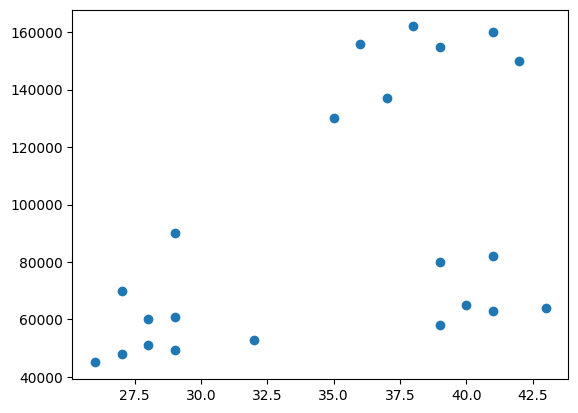

In [4]:
plt.scatter(df["Age"],df['Income($)'])

In [5]:
km =KMeans(n_clusters=3)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [6]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [7]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


C:\Users\USER\AppData\Local\Temp\ipykernel_14296\2420312776.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


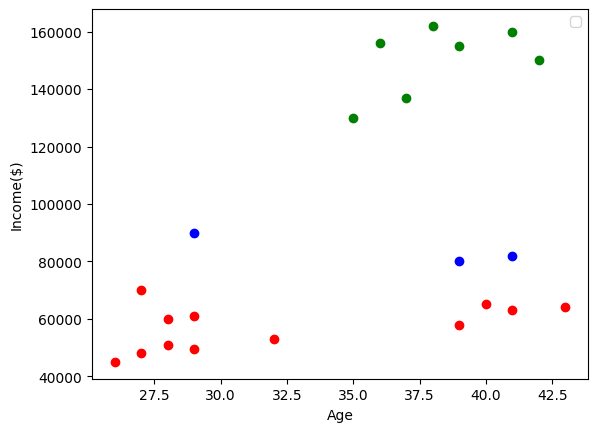

In [8]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]
plt.scatter(df1["Age"],df1["Income($)"],color = 'green')
plt.scatter(df2["Age"],df2["Income($)"],color = 'red')
plt.scatter(df3["Age"],df3["Income($)"],color = 'blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

After scaling

In [9]:
scalar = MinMaxScaler()
df["Income($)"] = scalar.fit_transform(df[['Income($)']])
df["Age"] = scalar.fit_transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [10]:
km =KMeans(n_clusters=3)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [11]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [12]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


C:\Users\USER\AppData\Local\Temp\ipykernel_14296\2420312776.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


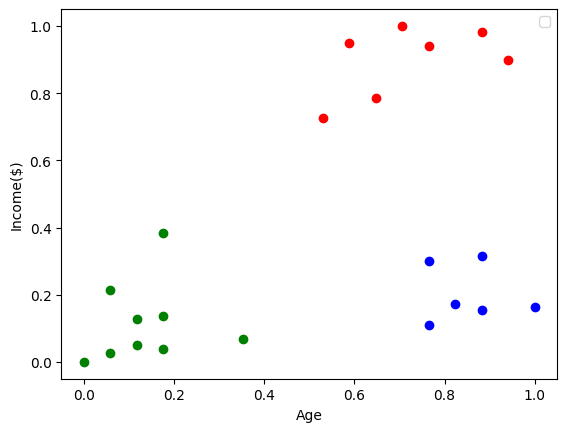

In [13]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]
plt.scatter(df1["Age"],df1["Income($)"],color = 'green')
plt.scatter(df2["Age"],df2["Income($)"],color = 'red')
plt.scatter(df3["Age"],df3["Income($)"],color = 'blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [14]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

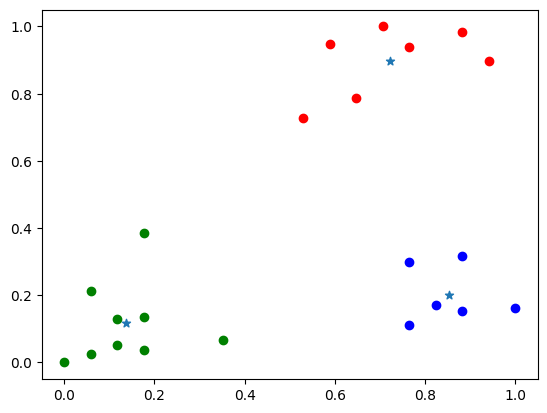

In [15]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]
plt.scatter(df1["Age"],df1["Income($)"],color = 'green')
plt.scatter(df2["Age"],df2["Income($)"],color = 'red')
plt.scatter(df3["Age"],df3["Income($)"],color = 'blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*")

Elbow Plot Technique to Determine The number of clusters (K) possible.

In [16]:
k_rng = range(1,10)
sse = []
for  k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

In [17]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.38815291664787444,
 0.26217927623452136,
 0.2411375993892335,
 0.1888386881998807,
 0.14391444958090924,
 0.11612804668175383]

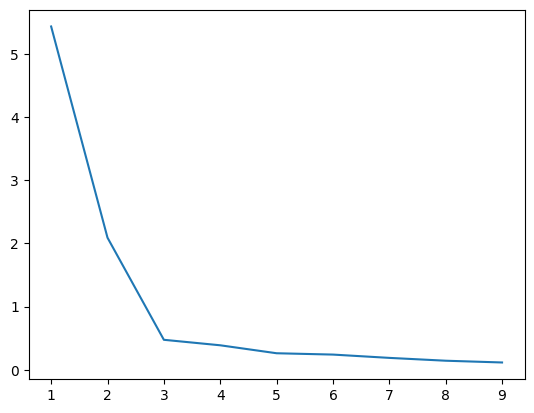

In [18]:
plt.plot(k_rng,sse)